
# Sold Prices in Tallkrogen

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from subprocess import check_output


### Call the Node Hemnet scraper which saves .json data file of sold properties in Tallkrogen

In [27]:
check_output(['node', '../hemnet-scraper/index.js'])

b''

### Read in sold propertie json as dataframe

In [29]:
tallkrogen_sold_prices_df = pd.read_json("../data/salesData.json")


,address,houseArea,rooms,land,soldPrice,soldDate
0,Herrhagsvägen 116,64,5,577,6000000,28/4/2017
1,Krokvägen 114,98,6,602,9550000,28/4/2017
2,VictorBalcksväg 148,65,5,430,7650000,27/4/2017
3,Olympiavägen 72,54,4,495,6825000,22/3/2017
4,Sandemarsvägen 4,99,7,499,10100000,22/3/2017


In [37]:
tallkrogen_sold_prices_df.head()

,address,houseArea,rooms,land,soldPrice,soldDate
0,Herrhagsvägen 116,64,5,577,6000000,2017-04-28
1,Krokvägen 114,98,6,602,9550000,2017-04-28
2,VictorBalcksväg 148,65,5,430,7650000,2017-04-27
3,Olympiavägen 72,54,4,495,6825000,2017-03-22
4,Sandemarsvägen 4,99,7,499,10100000,2017-03-22


In [38]:
tallkrogen_sold_prices_df.info

<bound method DataFrame.info of                  address  houseArea rooms  land  soldPrice   soldDate
0      Herrhagsvägen 116         64     5   577    6000000 2017-04-28
1          Krokvägen 114         98     6   602    9550000 2017-04-28
2    VictorBalcksväg 148         65     5   430    7650000 2017-04-27
3        Olympiavägen 72         54     4   495    6825000 2017-03-22
4       Sandemarsvägen 4         99     7   499   10100000 2017-03-22
..                   ...        ...   ...   ...        ...        ...
252  VictorBalcksväg 141         66     5   577    4250000 2013-09-13
253       Amatörvägen 11         65     4   338    4250000 2013-08-29
254       Diskusvägen 32        106     6  1022    5140000 2013-07-05
255      Rikstensvägen 6         93     7   623    5250000 2013-06-11
256      Träningsvägen 3         50     3   337    4420000 2013-05-31

[257 rows x 6 columns]>

In [39]:
tallkrogen_sold_prices_df['soldDate'] = pd.to_datetime(tallkrogen_sold_prices_df['soldDate'], dayfirst=True)

In [68]:
tallkrogen_sold_prices_df.tail(50)

,address,houseArea,rooms,land,soldPrice,soldDate
207,Krokvägen 135,65,6,578,6790000,2015-06-04
208,Träningsvägen 14,93,6,365,7400000,2015-06-03
209,Kulstötarvägen 52,525,tomt,,3335000,2015-06-03
210,Mörkövägen 51,70,4,441,4500000,2015-05-30
211,Diskusvägen 31,83,4,551,5100000,2015-05-26
212,Rapphönsvägen 5,87,5,499,6900000,2015-05-13
213,Rapphönsvägen 31,101,6,557,8440000,2015-05-13
214,Sandemarsvägen 18,205,8,1378,9600000,2015-05-09
215,Maratonvägen 119,54,4,488,4500000,2015-04-24
216,Morkullsvägen 15,65,5,543,6750000,2015-04-22


In [42]:
tallkrogen_sold_prices_df["soldDate"]

0     2017-04-28
1     2017-04-28
2     2017-04-27
3     2017-03-22
4     2017-03-22
         ...    
252   2013-09-13
253   2013-08-29
254   2013-07-05
255   2013-06-11
256   2013-05-31
Name: soldDate, Length: 257, dtype: datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   address    257 non-null    object        
 1   houseArea  257 non-null    int64         
 2   rooms      257 non-null    object        
 3   land       257 non-null    object        
 4   soldPrice  257 non-null    int64         
 5   soldDate   257 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 12.2+ KB


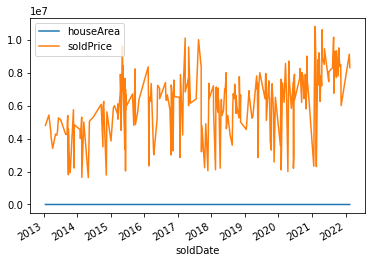

In [43]:
tallkrogen_sold_prices_df.info()

tallkrogen_sold_prices_df.plot(x='soldDate')
plt.show()

Text(0, 0.5, 'Sq Foot Area')

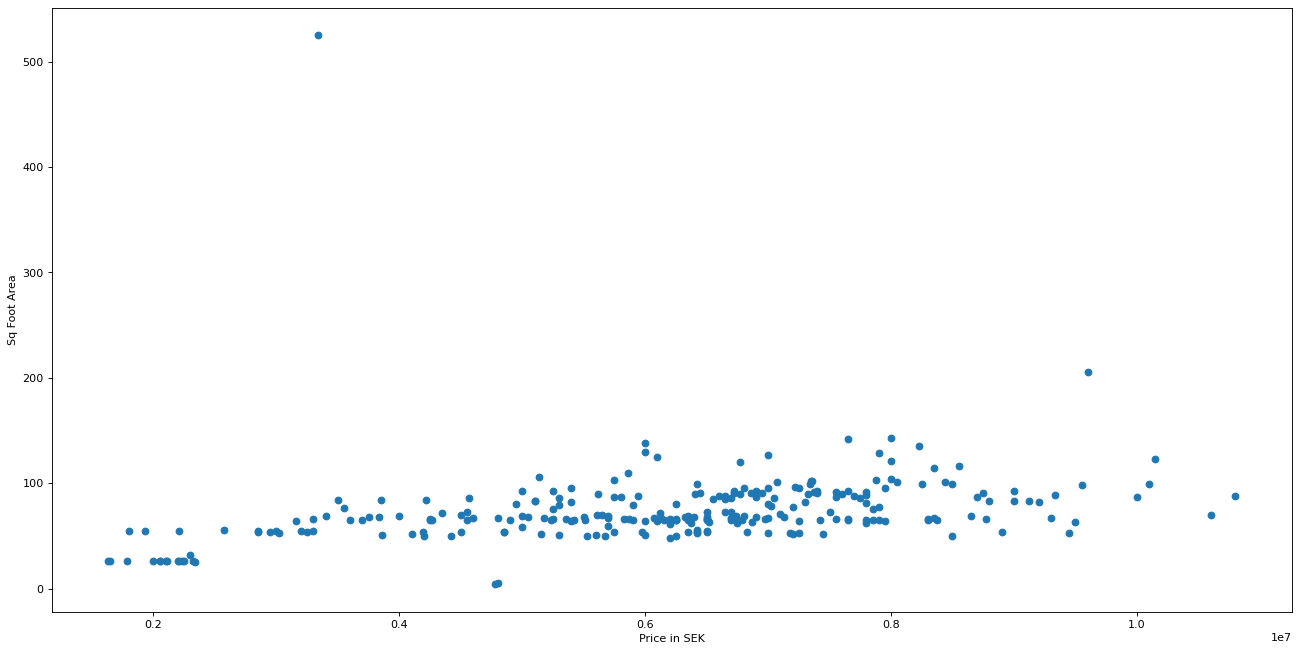

In [44]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldPrice"], y=tallkrogen_sold_prices_df["houseArea"])
plt.xlabel("Price in SEK")
plt.ylabel("Sq Foot Area")

In [72]:

tallkrogen_sold_prices_df.loc[tallkrogen_sold_prices_df['houseArea'] > 400]

,address,houseArea,rooms,land,soldPrice,soldDate
209,Kulstötarvägen 52,525,tomt,,3335000,2015-06-03


Text(0, 0.5, 'Date')

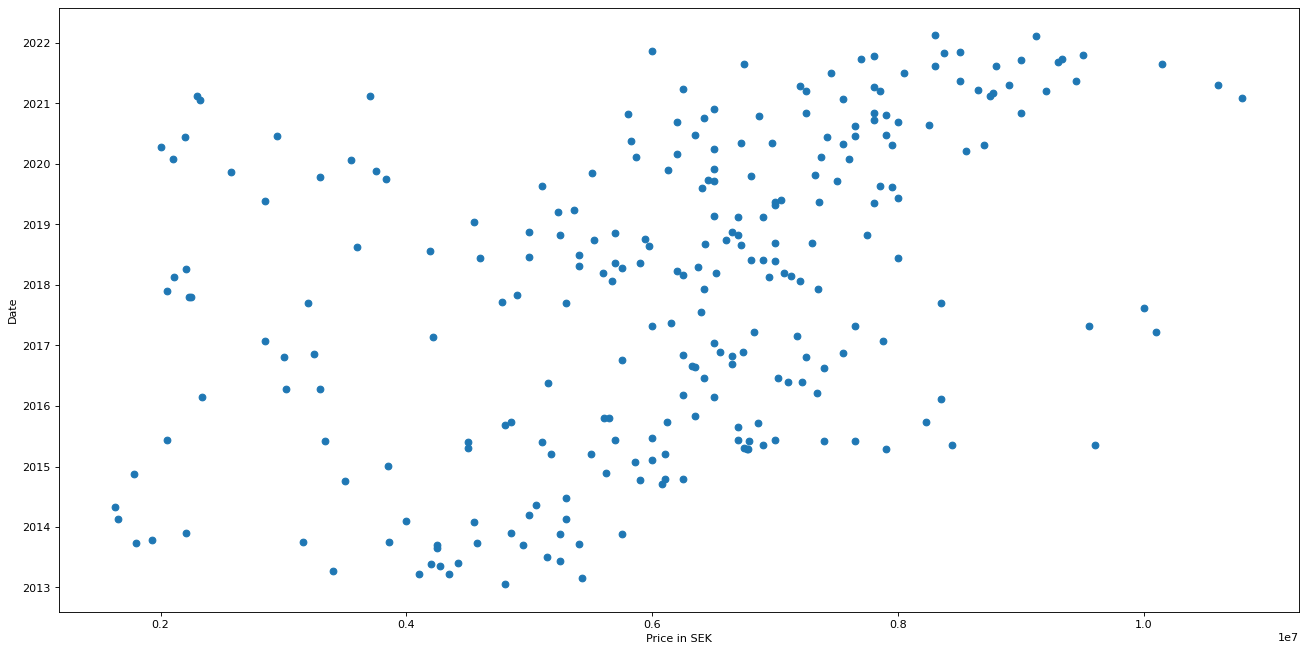

In [45]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldPrice"], y=tallkrogen_sold_prices_df["soldDate"])
plt.xlabel("Price in SEK")
plt.ylabel("Date")

In [52]:
X = tallkrogen_sold_prices_df[["houseArea"]]
y = tallkrogen_sold_prices_df["soldPrice"]
reg = LinearRegression().fit(X, y)

In [53]:
y_predict = reg.predict(X)


In [55]:
reg.predict([[147]])

array([7208091.93220485])

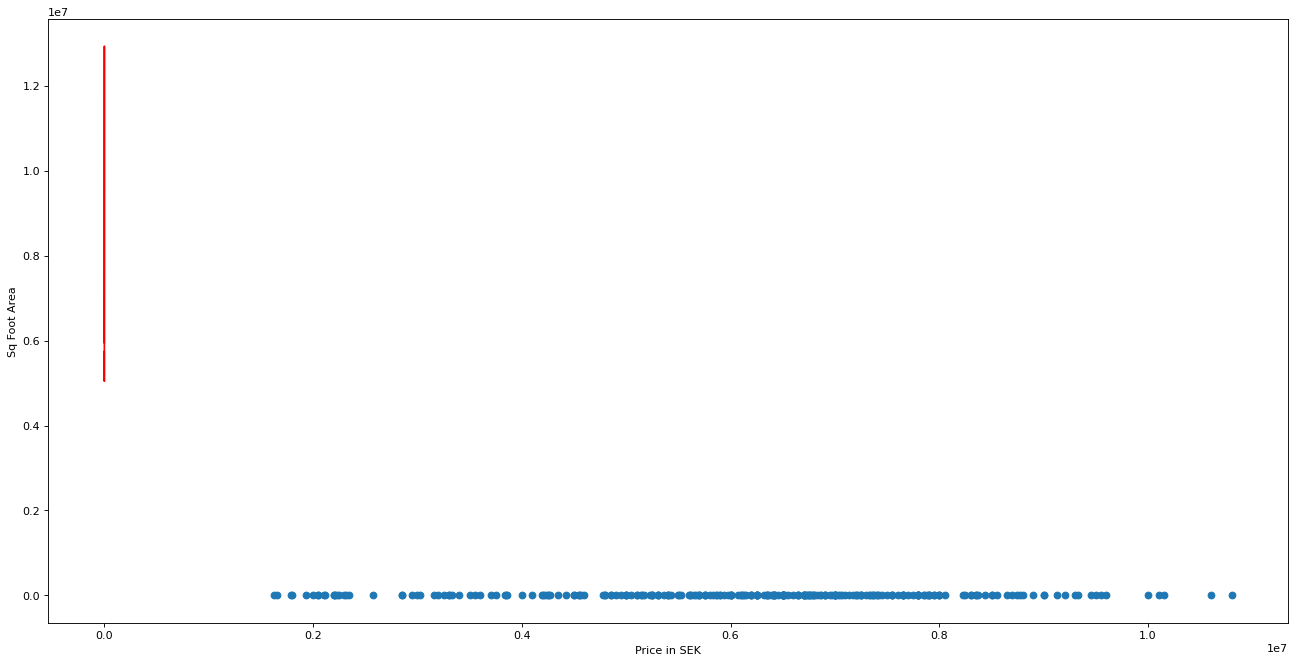

In [60]:

plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldPrice"], y=tallkrogen_sold_prices_df["houseArea"])
plt.xlabel("Price in SEK")
plt.ylabel("Sq Foot Area")
plt.plot(X["houseArea"], y_predict, '-r', label='linear regression')


In [101]:
X = tallkrogen_sold_prices_df[["soldPrice"]]
y = tallkrogen_sold_prices_df["soldDate"]
reg = LinearRegression().fit(X, y)

In [102]:
y_predict = reg.predict(X)

KeyError: 'soldPrice'

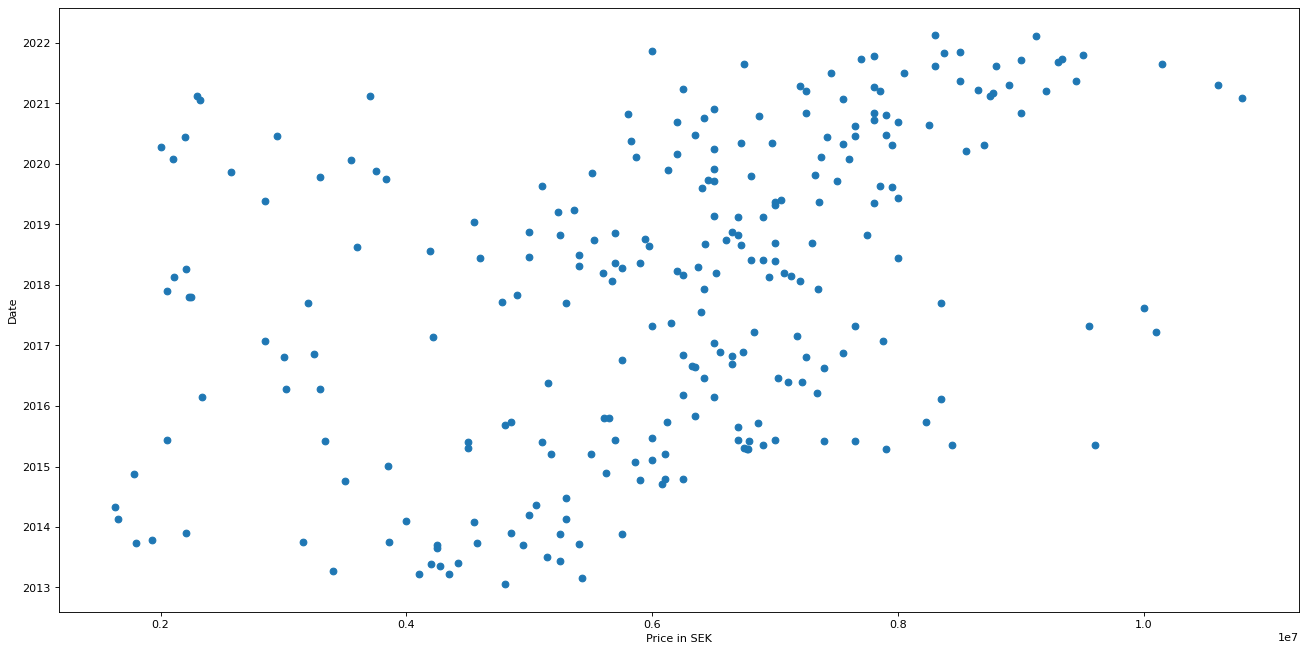

In [61]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldPrice"], y=tallkrogen_sold_prices_df["soldDate"])
plt.xlabel("Price in SEK")
plt.ylabel("Date")
plt.plot(X["soldPrice"], y_predict, '-r', label='linear regression')

## 